In [33]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

iris = load_iris(as_frame=True)
df = iris.frame
print(df.head())





   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [11]:
print(df.info())
print(df.describe())
print(df['target'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [12]:
print(df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [18]:
# Remove duplicates
df = df.drop_duplicates()

# Confirm again
print("Duplicates after removal:", df.duplicated().sum())



Duplicates after removal: 0


In [19]:
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        149.000000         149.000000   
mean            5.843624          3.059732           3.748993   
std             0.830851          0.436342           1.767791   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.300000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        149.000000  149.000000  
mean           1.194631    0.993289  
std            0.762622    0.817847  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [20]:
print(df['target'].value_counts())


target
0    50
1    50
2    49
Name: count, dtype: int64


In [17]:
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


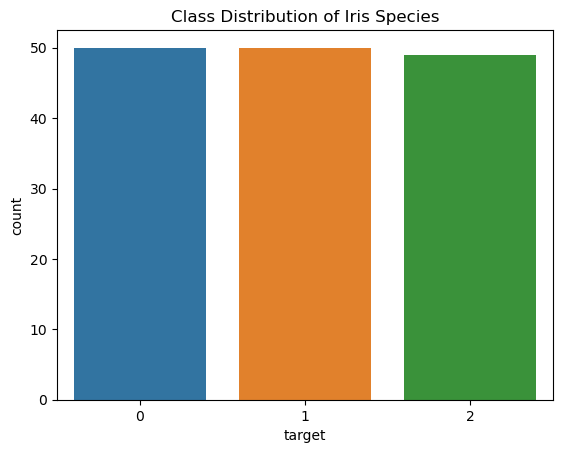

In [21]:
sns.countplot(x="target", data=df)
plt.title("Class Distribution of Iris Species")
plt.show()

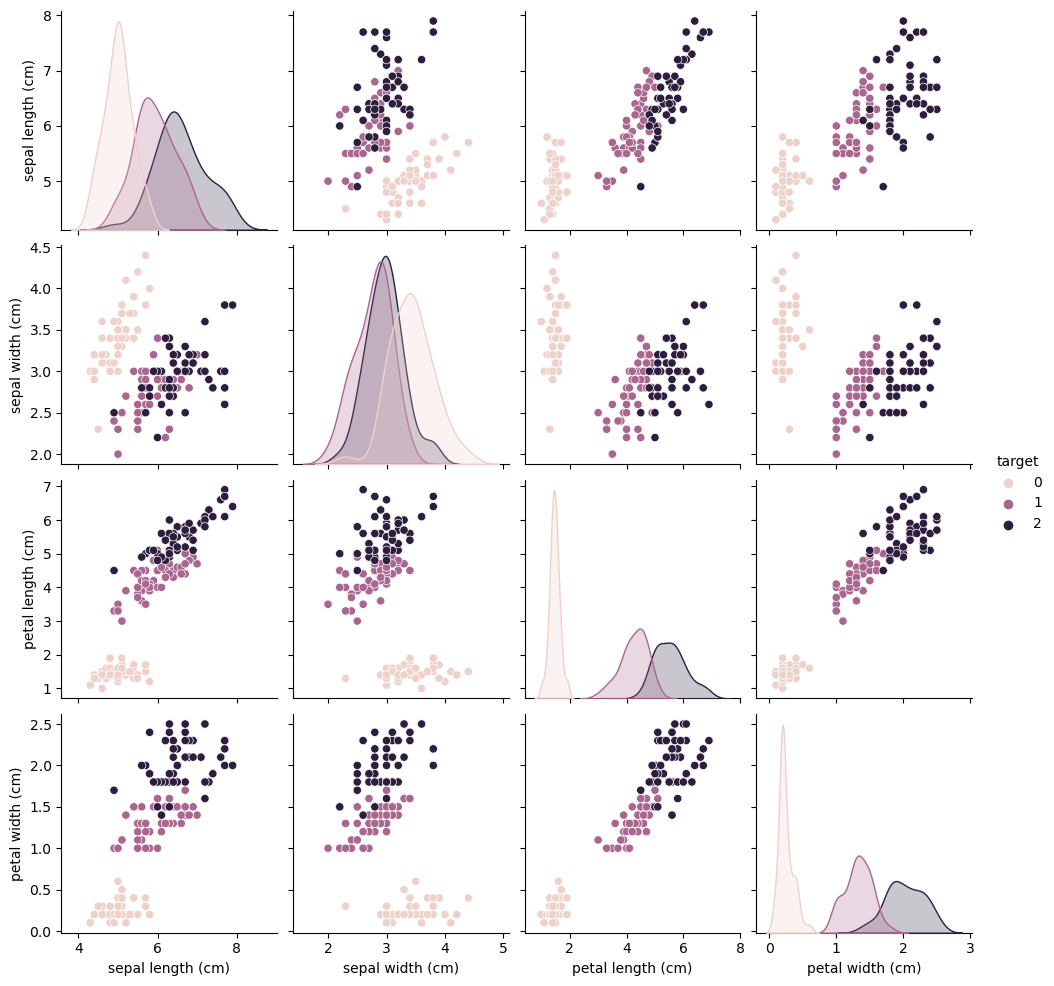

In [27]:
sns.pairplot(df, hue="target", diag_kind="kde")
plt.show()


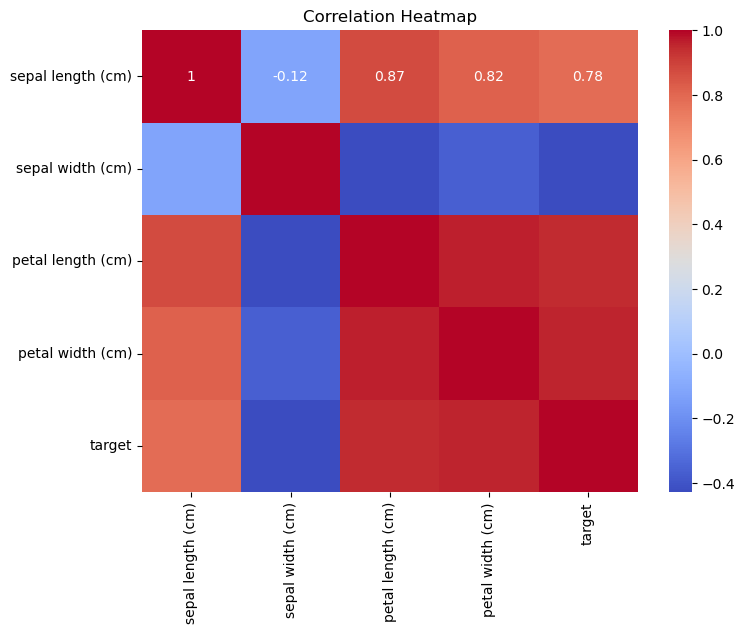

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


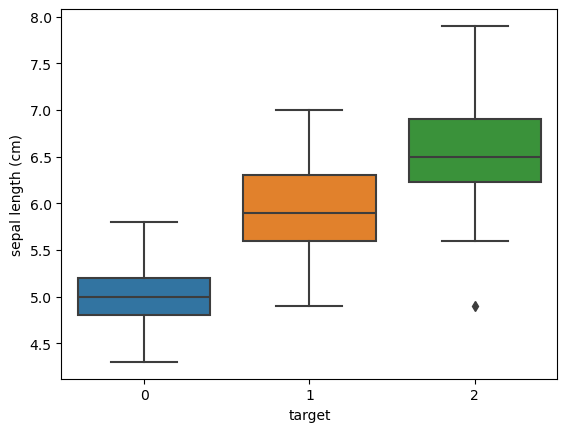

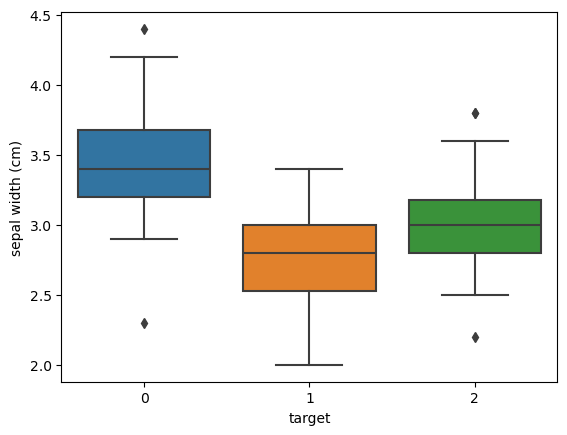

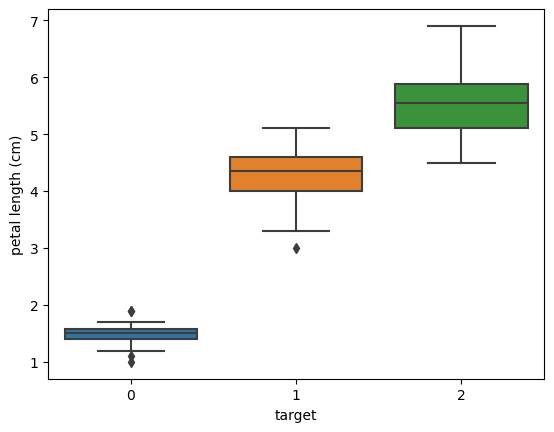

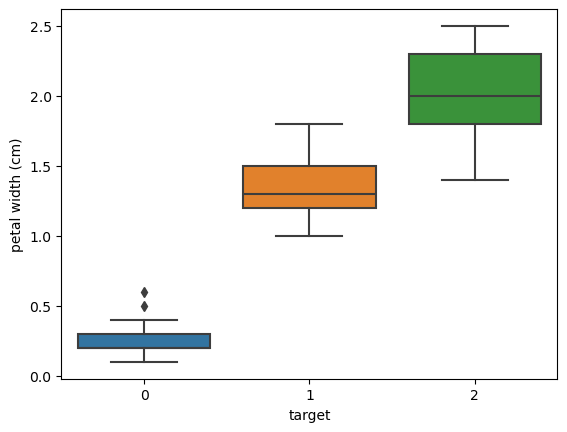

In [29]:
for col in df.columns[:-1]:
    sns.boxplot(x="target", y=col, data=df)
    plt.show()


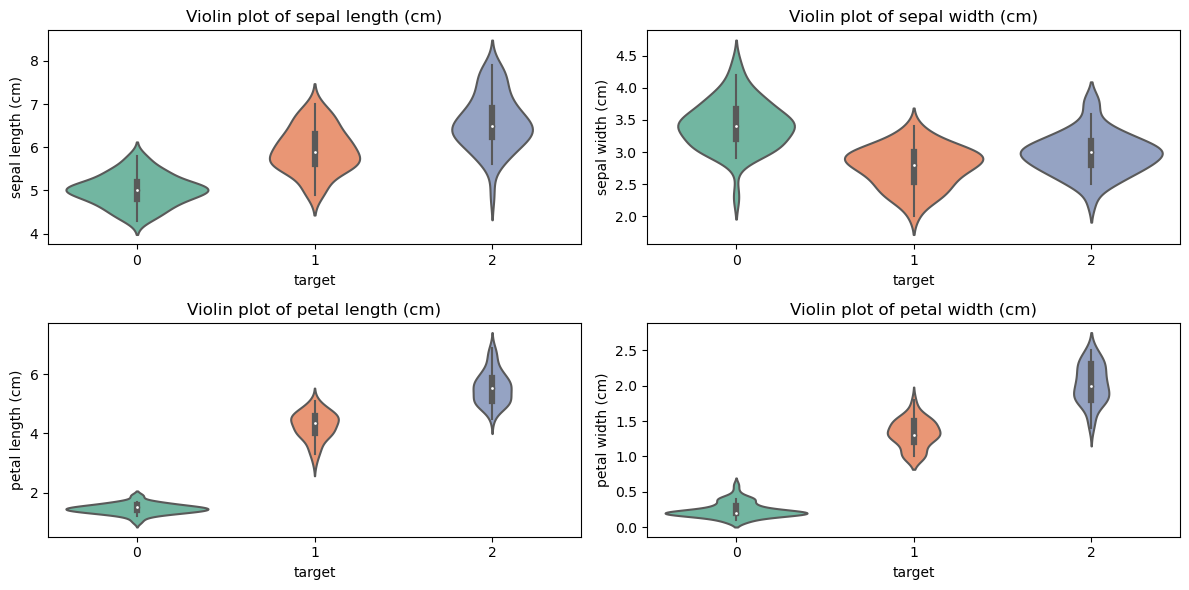

In [30]:
plt.figure(figsize=(12,6))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2,2,i)
    sns.violinplot(x="target", y=col, data=df, palette="Set2")
    plt.title(f"Violin plot of {col}")
plt.tight_layout()
plt.show()


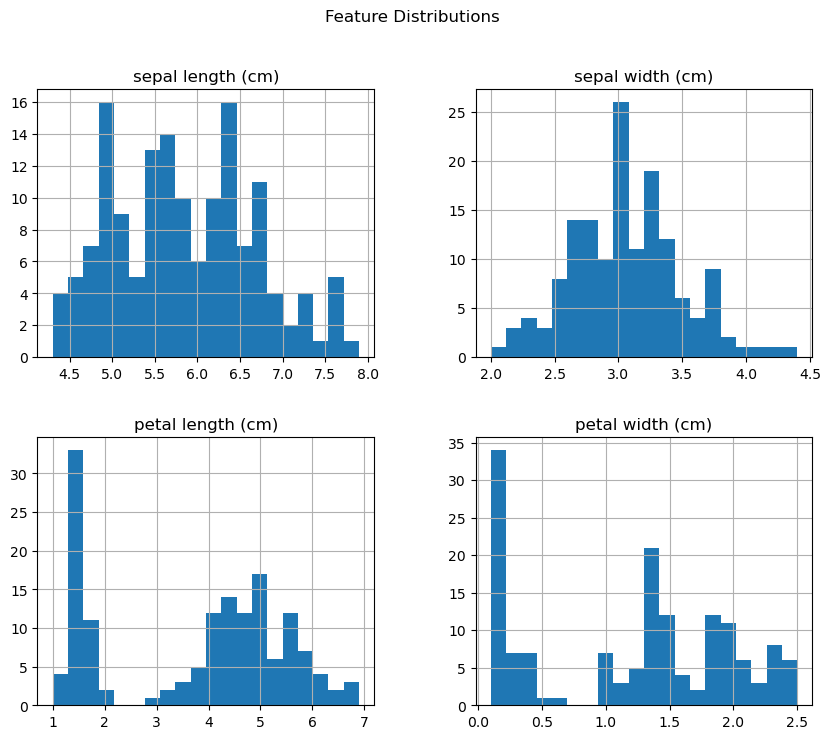

In [31]:
df.drop("target", axis=1).hist(bins=20, figsize=(10,8))
plt.suptitle("Feature Distributions")
plt.show()


In [32]:
print(df.groupby("target").mean())


        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                   5.006             3.428              1.462   
1                   5.936             2.770              4.260   
2                   6.588             2.974              5.552   

        petal width (cm)  
target                    
0                  0.246  
1                  1.326  
2                  2.026  


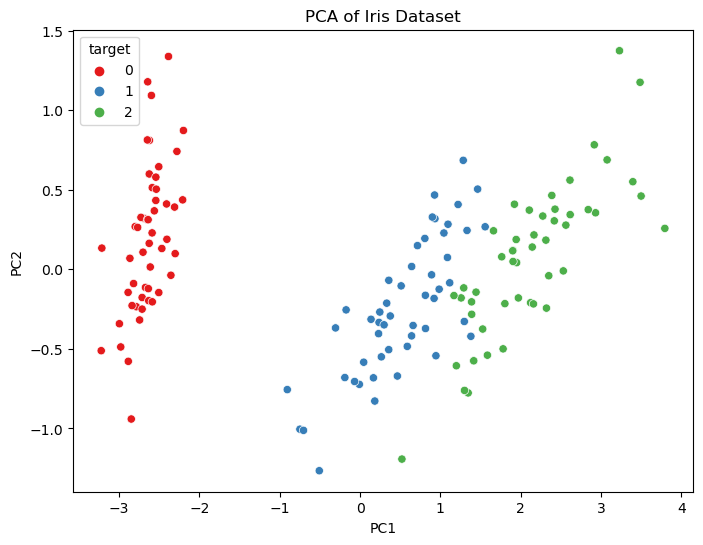

In [34]:

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(df.drop("target", axis=1))
iris_pca = pd.DataFrame(iris_pca, columns=["PC1","PC2"])
iris_pca["target"] = df["target"]

plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="target", data=iris_pca, palette="Set1")
plt.title("PCA of Iris Dataset")
plt.show()


In [ ]:
#Data Quality

#No missing values were found in the dataset.

#Only 1 duplicate entry was detected → removed for a clean dataset with 149 unique samples.

#Class Distribution

#The dataset is well balanced with nearly equal samples for all three species:

#Setosa → 50

#Versicolor → 50

#Virginica → 49

#Feature Insights

#Sepal features (length & width): show some overlap across species → not very strong for separation.

#Petal features (length & width): show clear separation among species → strong indicators for classification.

#Feature-wise mean comparison confirmed that petal length and width increase progressively from Setosa → Versicolor → Virginica.

#Correlation & Relationships

#Strong correlation observed between petal length and petal width.

#Pairplots and boxplots confirmed that Setosa is well-separated, while Versicolor and Virginica overlap slightly.

#Dimensionality Reduction (PCA)

#PCA (2D plot) showed clear clustering of the three species.

#Confirms that the dataset is linearly separable, making it suitable for machine learning classification models.